In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot 
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Энтропийная коррекция для метода Роу

В решение линеаризованной задачи Римана присутствуют только скачки. Оно неплохо описывает скачок уплотнения и контактный разрыв, в то время как волну разрежения, когда вдоль протяженной области параметры изменеяются непрерывно, сложно представить как линию разрыва, где параметры меняются скачообразно. Это особенно заметно в случае трансзвуковой волны разрежения, которая в линеаризованном виде превращается в *скачок разрежения*, существование которого противоречит второму началу термодинамики.

Структура волн, соответсвующая точному решению задачи Сода, представлена на рисунке.

![Левая трансзвуковая волна разрежения](./figures/left_transonic_rar_wave.png)

Она содержит левую _трансзвуковую_ волну разрежения, контактный разрыв и правый скачок уплотнения. Вдоль левой волны разрежения собтвенное число $\lambda_1 = u-a$ меняет знак при движении слева напрво. Значит, есть точка, где $\lambda_1 = u- a=0$ и выполняется условие $u=a$.

Скорость _головы_ волны разрежения определяется по параметрам слева

$$
\lambda_1^L(\mathbf{U}_L) = S_{HL} = u_L - a_L \lt 0,
$$

а скорость _хвоста_ — по параметрам в зоне со хвехдочкой:

$$
\lambda_1^R(\mathbf{U}_{*L}) = S_{HL} = u_{*} - a_{* L} \gt 0.
$$

Предположим, что величины $u_*$ и $a_{*L}$ нам известны. Элементарный скачок начальных условий


$$\mathbf{U}_{*L} - \mathbf{U}_{L} = \tilde{\alpha_1}\tilde{\mathbf{K}}^{(1)},$$

движущийся со скоростью $\tilde{\lambda}_1$ разделяется на два скачка поменьше: $\mathbf{U}_{SL} - \mathbf{U}_{L}$ и $\mathbf{U}_{*L} - \mathbf{U}_{SL}$, которые движутся со скоростями $\lambda_1^L$ и $\lambda_1^R$. $\mathbf{U}_{SL}$ – трансзвуковое решение, которое нужно найти.

![Энтропийная коррекция](./figures/entropy_fix.png)

Если записать интегральный закон сохранения, получим соотношение

$$
\lambda_1^R(\mathbf{U}_{SL} - U_{*L}) + \lambda_1^L(\mathbf{U}_{L} - U_{SL}) = \tilde{\lambda}_1^R(\mathbf{U}_{L} - \mathbf{U}_{*L}),
$$

из которого можно выразить $\mathbf{U}_{SL}$:

$$
\mathbf{U}_{SL} = \frac{(\tilde{\lambda}_1 - \lambda_1^L)\mathbf{U}_{L} + (\lambda_1^R - \tilde{\lambda}_1)\mathbf{U}_{*L} }{\lambda_1^R - \lambda_1^L}
$$

Для расчета потока по формуле

$$
\mathbf{F}_{i+\frac{1}{2}} = \mathbf{F}_L + \sum_{\tilde{\lambda}_i\le0} \tilde{\lambda}_i \tilde{\alpha}_i  \tilde{\mathbf{K}^{(i)}},
$$

в сумме будет только одно слагаемое, соответсвующее скачку $\mathbf{U}_{SL} - \mathbf{U}_{L}$ и скорости $\lambda_1^L \lt 0$.

Поскольку 

$$
\mathbf{U}_{SL} - \mathbf{U}_{L} = \frac{\lambda_1^R - \tilde{\lambda}_1}{{\lambda_1^R - \lambda_1^L}}(\mathbf{U}_{*L} - \mathbf{U}_{L}),
$$

а с другой стороны

$$\mathbf{U}_{*L} - \mathbf{U}_{L} = \tilde{\alpha_1}\tilde{\mathbf{K}}^{(1)},$$

то соответвствующее волне $\lambda_1^L$ изменение потока $\mathbf{\Delta F}_1^L$ можно записать в виде

$$
\mathbf{\Delta F}_1^L = \lambda_1^L \left( \frac{\lambda_1^R - \tilde{\lambda}_1}{{\lambda_1^R - \lambda_1^L}}\right)\tilde{\alpha}_i\tilde{\mathbf{K}^{(1)}}
$$

Таким образом, введя новую, поправленную, скорость распространения волны

$$
\overline{\lambda}_1 = \lambda_1^L \left( \frac{\lambda_1^R - \tilde{\lambda}_1}{{\lambda_1^R - \lambda_1^L}}\right),
$$

поток на грани ячейки снова можно записать в привычном виде:

$$
\mathbf{F}_{i+\frac{1}{2}} = \mathbf{F}_L + \overline{\lambda}_1 \tilde{\alpha}_1 \tilde{\mathbf{K}^{(1)}}.
$$


В случае правой волны разрежения можно получить аналогичные формулы:

* Скорости хвоста и головы волны разрежения:

$$
\lambda_3^L = u_*+a_{*R}, \ \lambda_3^R = u_R+a_{R}
$$

если $\lambda_3^L \lt 0 \lt \lambda_3^R$, то волна трансзвуковая, и нужно вводить поправку.
* Поправленная скорость распространения волны:

$$
\overline{\lambda}_3 = \lambda_3^R \left( \frac{\tilde{\lambda}_3 - \lambda_3^L }{{\lambda_3^R - \lambda_3^L}}\right),
$$

* Поток на грани ячейки :

$$
\mathbf{F}_{i+\frac{1}{2}} = \mathbf{F}_R - \overline{\lambda}_3 \tilde{\alpha}_3 \tilde{\mathbf{K}^{(3)}}.
$$

## Откуда брать скорости?

Для того чтобы определить $u_∗, a_{∗L}, a_{∗R}$ и скоростии волн $\overline{\lambda}_1$ и $\overline{\lambda}_3$, необходимы параметры в зоне со звездочкой, например, $\mathbf{U}_{*L}$ и $\mathbf{U}_{*R}$. Это можно сделать разными способами. Для удобства, функции, созданные для реализации метода Роу, помещены во внешний файл `roe.py`. Чтобы воспользоваться ими в этом ноутбуке, подгорузим файл при помощи "магической" комманды

```
%run roe.py
```

In [1]:
%run roe.py

### Готовые значения из метода Роу

Вообще говоря, если у нас реализован метод Роу для решения задачи Римана, то все необходимые данные уже присутсвуют. Поскольку уже вычислены собственные значения и собственные векторы $\tilde{\alpha}_i$ и $\tilde{\mathbf{K}}^{(i)}$, для левой волны можно записать: 

$$\mathbf{U}_{*L} = \mathbf{U}_{L} + \tilde{\alpha_1}\tilde{\mathbf{K}}^{(1)},$$

а для правой:

$$\mathbf{U}_{*R} = \mathbf{U}_{R} - \tilde{\alpha_3}\tilde{\mathbf{K}}^{(3)},$$


что позволить вычислить примитивные переменные и скорости звука $a_{∗L} = \sqrt{\frac{\gamma p_∗}{ρ_{∗L}}}$ и $a_{∗R} = \sqrt{\frac{\gamma p_∗}{ρ_{∗R}}}$




In [4]:
def RAS(Wl,Wr):
    cl = sound_speed(Wl)
    cr = sound_speed(Wr)
    
    averages = roe_average(Wl,Wr)
    lambdas = roe_eigen_values(averages)
    K = roe_eigen_vectors(averages)
    alphas = alfas(W_to_U(Wr) - W_to_U(Wl), averages)
    
    
    UL_star = W_to_U(Wl) + alphas[0]*K[0]
    WL_star = U_to_W(UL_star)
    cl_star = sound_speed(WL_star)
    u_l_star = WL_star[1]
    
    UR_star = W_to_U(Wr) - alphas[2]*K[2]
    WR_star = U_to_W(UR_star)
    cr_star = sound_speed(WR_star)
    u_r_star = WR_star[1]
    
   
    return {'left':np.array([cl_star,u_l_star]),
           'right':np.array([cr_star,u_r_star])}
    

### Решение для двух волн разрежения

Другой вариант — воспользоваться каким-либо из точных решений, считая что конфигурация волн нам изветсна. Например, для случая двух волн разрежения можно сразу выписать значение давления в зоне со звездой:

$$
p_* = \left[\frac{a_L+a_R - \frac{\gamma-1}{2}(u_R - u_L)}{a_L/p_L^z + a_R/p_R^z} \right]^\frac{1}{2},
$$

где $z = \frac{\gamma-1}{2\gamma}$. Искомые значения скростей звука и скоростей газа для левой и правой волны получатся по изоэнтропическим формулам:

$$
a_{*L} = a_{L}(p_*/p_L)^z,\ u_* = u_L + \frac{2}{(\gamma - 1)}(a_L - a_{*L})
$$

и

$$
a_{*R} = a_{R}(p_*/p_R)^z,\ u_* = u_R + \frac{2}{(\gamma - 1)}(a_{*R} - a_R )
$$

In [26]:
def TRRS(Wl,Wr):
    cl = sound_speed(Wl)
    cr = sound_speed(Wr)
    p_star = ((cl + cr - 0.5*g_m_1*(Wr[1] - Wl[1]))/
                ((cl/Wl[2]**g_m_1_over_2g) + (cr/Wr[2]**g_m_1_over_2g) ))**g_m_1_over_2g_inv
    cl_star = cl*(p_star/Wl[2])**g_m_1_over_2g
    u_l_star = Wl[1] + 2/g_m_1 *(cl - cl_star)
    cr_star = cr*(p_star/Wr[2])**g_m_1_over_2g
    u_r_star = Wr[1] + 2/g_m_1 *(cr - cr_star)
    return {'left':np.array([cl_star,u_l_star]),
           'right':np.array([cr_star,u_r_star])}
    

Собственно, ради чего все затевалось – нужно подправить функцию вычисления потоков Роу. Нужно выяснить, выполняется ли условие трансзвуковой волны разрежения для правой или левой волны. Если выполняется – вычислить поток по соответсвующей формуле с подправленными скоростями волн, если нет – вычислить значение потока на грани по исходной формуле для потока.

In [5]:
def roe_flux_fix(Wl,Wr):
    Fl,Fr = flux(Wl),flux(Wr)
    averages = roe_average(Wl,Wr)
    lambdas = roe_eigen_values(averages)
    K = roe_eigen_vectors(averages)
    alphas = alfas(W_to_U(Wr) - W_to_U(Wl), averages)
    
    #cl_star,ul_star = TRRS(Wl,Wr)['left']
    #cr_star,ur_star = TRRS(Wl,Wr)['right']
    
    cl_star,ul_star = RAS(Wl,Wr)['left']
    cr_star,ur_star = RAS(Wl,Wr)['right']
    
    lambda_0_l = Wl[1] - sound_speed(Wl)
    lambda_0_r = ul_star - cl_star
    
    if lambda_0_l < 0 < lambda_0_r:
        lambda_0_fix = lambda_0_l*((lambda_0_r - lambdas[0])/(lambda_0_r - lambda_0_l))
        roe_flux = Fl + lambda_0_fix*alphas[0]*K[0]
        return roe_flux
    
    lambda_2_r = Wr[1] + sound_speed(Wr)
    lambda_2_l = ur_star + cr_star
    
    if lambda_2_l < 0 < lambda_2_r:
        lambda_2_fix = lambda_2_r*((lambdas[2] - lambda_2_l)/(lambda_2_r - lambda_2_l))
        roe_flux = Fr - lambda_2_fix*alphas[2]*K[2]
        return roe_flux
    
    roe_flux = 0.5*(Fl + Fr - np.dot(alphas*abs(lambdas),K))
    return roe_flux

Проверяем, что получилось

In [6]:
def init(case):
    if case == 'sod':
        W_l = np.array([1, 0.75, 1])
        W_r = np.array([0.125, 0, 0.1])
        t = 0.25
    elif case == '123':
        W_l = np.array([1, -2, 0.4])
        W_r = np.array([1, 2, 0.4])
        t = 0.15
    elif case == 'left-woodward':
        W_l = np.array([1, 0, 1000])
        W_r = np.array([1, 0, 0.1])
        
        t = 0.012
    else : print('Unknown case!')
    return W_l, W_r, t

In [7]:
N_points = 101
x = np.linspace(0,1,N_points)
decay_pos = 0.3
W_correct= np.zeros((N_points,3))

In [8]:
dx = 1./(N_points - 1)
sigma = 0.9

W = np.zeros((N_points,3))
fluxes = np.zeros((N_points - 1,3))
U = np.zeros_like(W) 

In [9]:
W_l,W_r,t = init('sod')
W[np.where(x<decay_pos),:] = W_l
W[np.where(x>=decay_pos),:] = W_r

In [10]:
t_ = 0
#dt = 0.0002
U_n = np.copy(U)
while t_<t:
    U = W_to_U(W.T).T
    roe_fluxes = np.zeros((N_points - 1,3))
    speeds = np.zeros(N_points - 1)
    for i,x_ in enumerate(x[:-1]):
        
        roe_fluxes[i] =roe_flux_fix(W[i],W[i+1])
        c_l = sound_speed(W[i])
        c_r = sound_speed(W[i+1])
        speeds[i] = max(abs(W[i][1])+c_l,abs(W[i+1][1])+  c_r)

    
    dt = sigma*dx/max(speeds)
    U_n[1:-1,:] = U[1:-1,:] + dt/dx*(roe_fluxes[:-1,:]-roe_fluxes[1:,:]) 
    U_n[0,:] = U_n[1,:]
    U_n[-1,:] = U_n[-2,:]
    W = U_to_W(U_n.T).T
    t_=t_+dt

In [11]:
%store -r

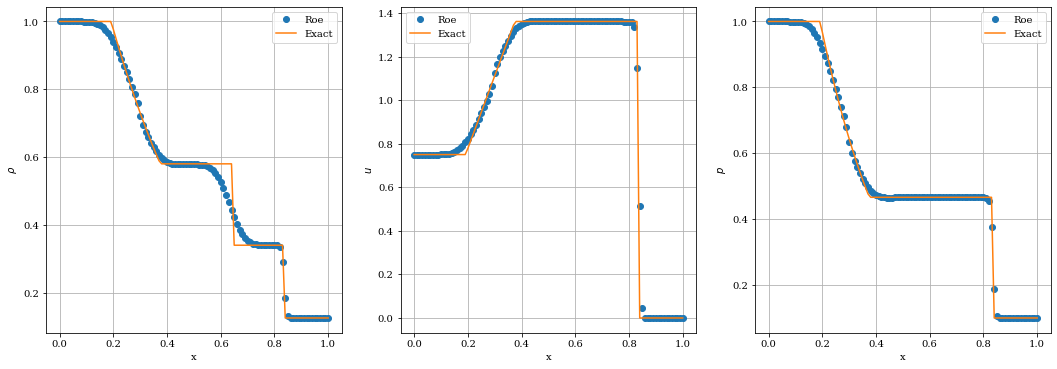

In [12]:
fig,axs = pyplot.subplots(1,3,figsize=(18,6) )

for ax, W_,  W_c, y_label in zip(axs, W.T,  W_correct.T, (r'$\rho$',r'$u$',r'$p$') ):
    ax.plot(x,W_,'o',label='Roe')
#    ax.plot(x,W_g_,'o',label='Godunov')
    ax.plot(x,W_c,label='Exact')
    ax.set_ylabel(y_label)
    ax.set_xlabel('x')
    scale_y = 1.1*abs(max(W_c)-min(W_c))
    ax.set_ylim(0.5*(max(W_c)+min(W_c) - scale_y), 0.5*(max(W_c)+min(W_c) + scale_y))
    ax.legend(loc='best')
    ax.grid()
    

Как видно, коррекции работают, на волне разрежения пропал разрыв. Как обстоит дело с другими тестами?

In [41]:
W_roe = np.copy(W)
%store W_roe

Stored 'W_roe' (ndarray)
